In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.impute import SimpleImputer

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

#### Loading Data

In [16]:
train_features = pd.read_csv('Training_Features.csv', index_col='respondent_id')
print("Shape of training features: ",train_features.shape)
train_features.head()

Shape of training features:  (26707, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [17]:
train_labels = pd.read_csv('Training_Labels.csv', index_col='respondent_id')
print("Shape of training labels: ",train_labels.shape)
train_labels.head()

Shape of training labels:  (26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [108]:
def data_information(df):
    
    ## Creating empty Data Frame
    data_info = pd.DataFrame(np.random.randn(0, 12) * 0,
                            columns=['No. of Observations (Nrows)',
                                     'No. of Variables (Ncols)',
                                     'No. of Numeric Variables',
                                     'No. of Factor Variables',
                                     'No. of Categorical Variables',
                                     'No. of Logical Variables',
                                     'No. of Date Variables',
                                     'No. of Zero variance Variables (Uniform)',
                                     '% of Variables having complete values',
                                     '% of Variables having <= 50% missing values',
                                     '% of Variables having >50% missing values',
                                     '% of Variables having >90% missing values'])
    
    # Data Info
    data_info.loc[0, 'No. of Observations (Nrows)'] = df.shape[0]
    data_info.loc[0, 'No. of Variables (Ncols)'] = df.shape[1]
    data_info.loc[0, 'No. of Numeric Variables'] = df._get_numeric_data().shape[1]
    data_info.loc[0, 'No. of Factor Variables'] = df.select_dtypes(include='category').shape[1]
    data_info.loc[0, 'No. of Categorical Variables'] = df.select_dtypes(include='object').shape[1]
    data_info.loc[0, 'No. of Logical Variables'] = df.select_dtypes(include='bool').shape[1]
    data_info.loc[0, 'No. of Date Variables'] = df.select_dtypes(include='datetime64').shape[1]
    data_info.loc[0, 'No. of Zero variance Variables (Uniform)'] = df.loc[:, df.apply(pd.Series.nunique)==1].shape[1]
    
    null_per = pd.DataFrame(df.isnull().sum()/df.shape[0])
    null_per.columns = ['null_per']
    
    data_info.loc[0, '% of Variables having complete values'] = null_per[null_per.null_per == 0].shape[0] * 100 / df.shape[1]
    data_info.loc[0, '% of Variables having <= 50% missing values'] = null_per[null_per.null_per <= 0.50].shape[0] * 100 / df.shape[1]
    data_info.loc[0, '% of Variables having >50% missing values'] = null_per[null_per.null_per > 0.50].shape[0] * 100 / df.shape[1]
    data_info.loc[0, '% of Variables having >90% missing values'] = null_per[null_per.null_per > 0.90].shape[0] * 100 / df.shape[1]
    
    ## Transposing data to get into consumable format
    data_info = data_info.transpose()
    data_info.columns = ['value']
    data_info['value'] = data_info['value'].astype(int)
    
    return data_info

In [109]:
data_information(train_features)

,value
No. of Observations (Nrows),26707
No. of Variables (Ncols),35
No. of Numeric Variables,23
No. of Factor Variables,0
No. of Categorical Variables,12
No. of Logical Variables,0
No. of Date Variables,0
No. of Zero variance Variables (Uniform),0
% of Variables having complete values,14
% of Variables having <= 50% missing values,97


**Findings**
- Total Variabels : 35
- Numerical Variables : 23
- Categorical - 12
- 14% of variables don't have missing values
- 97% of variables has <= 50% missing values
- only 2% of variables has > 50% Null values and no variable has > 90% Null values

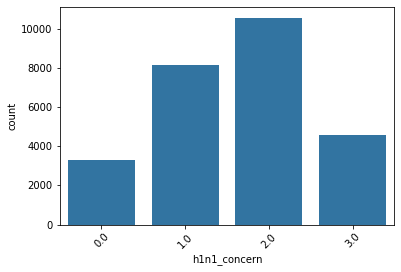

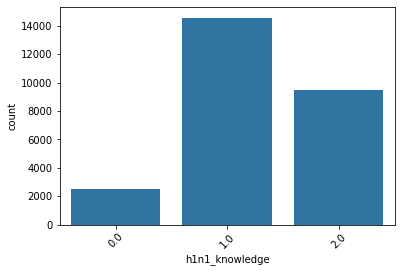

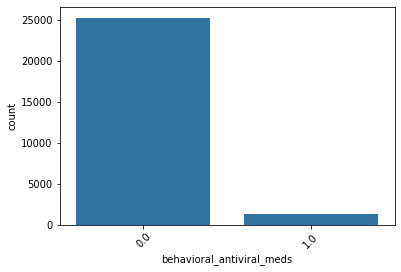

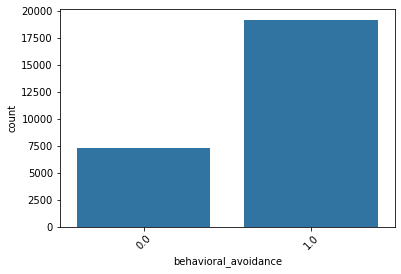

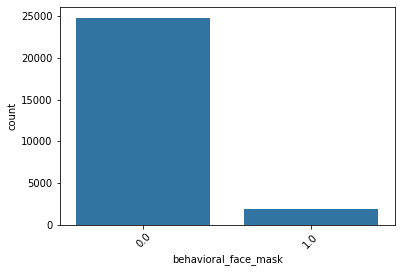

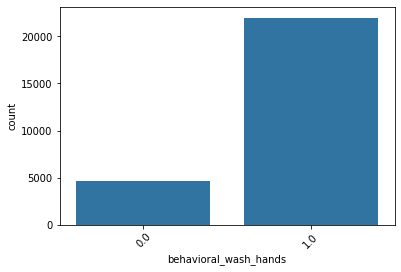

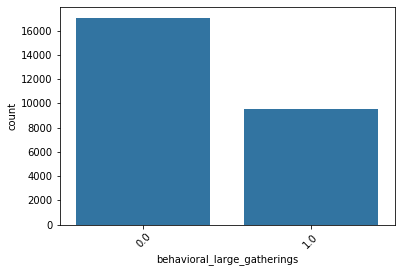

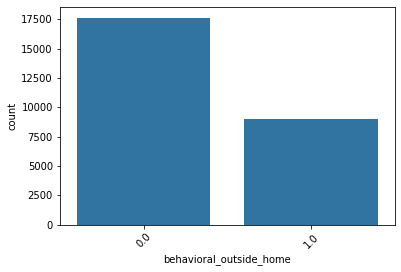

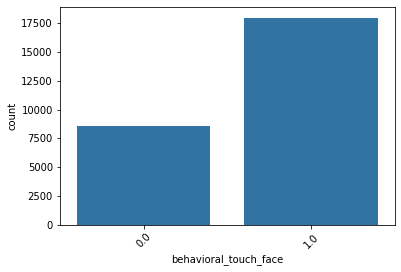

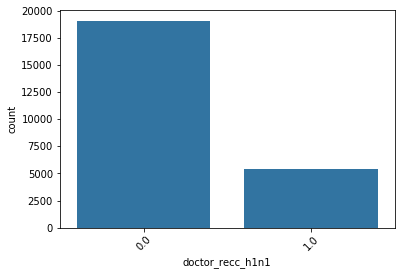

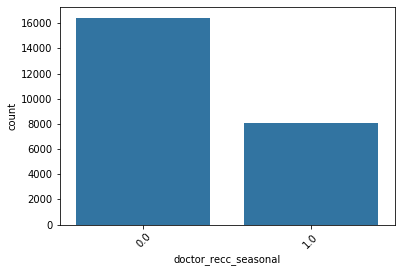

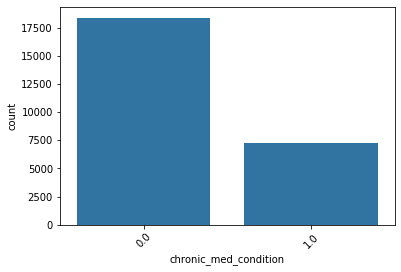

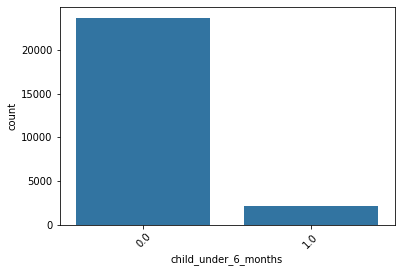

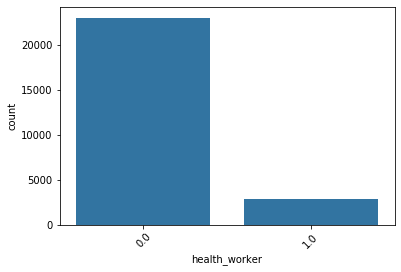

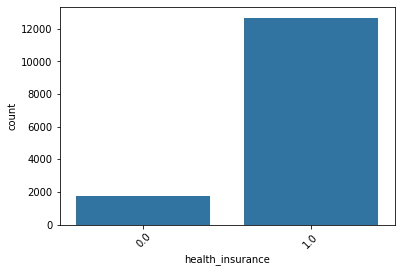

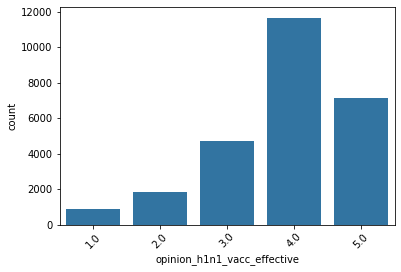

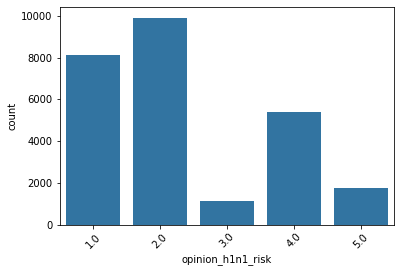

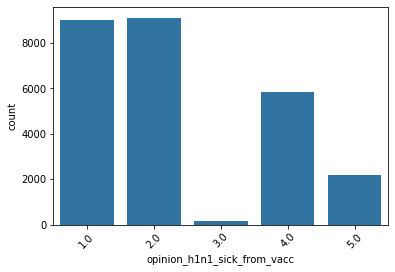

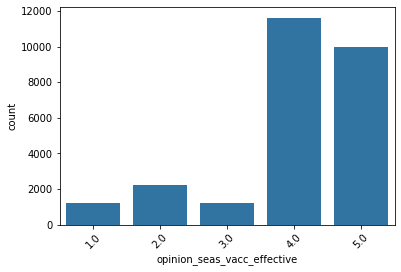

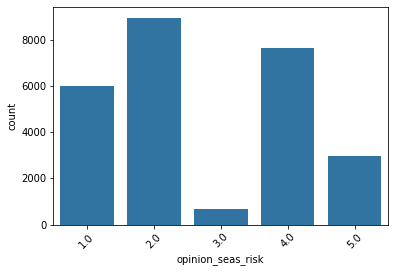

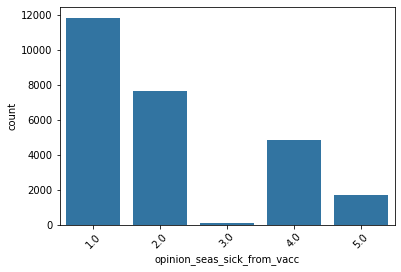

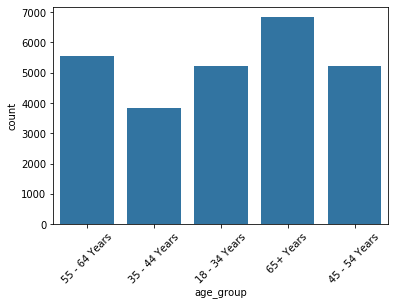

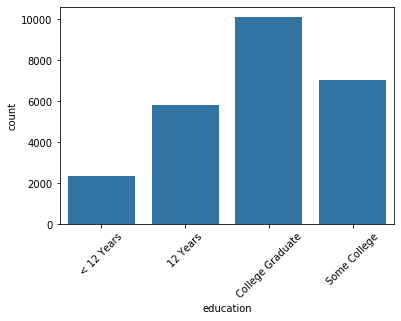

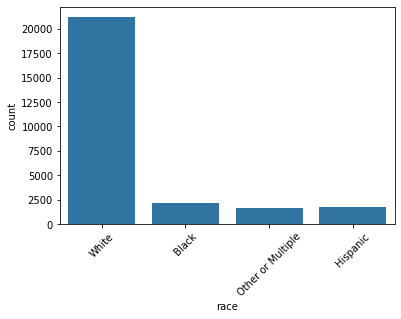

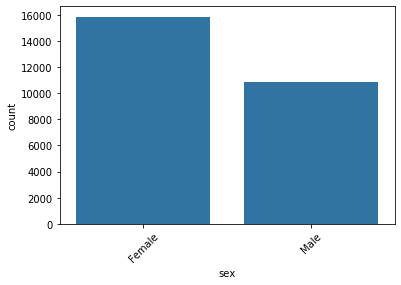

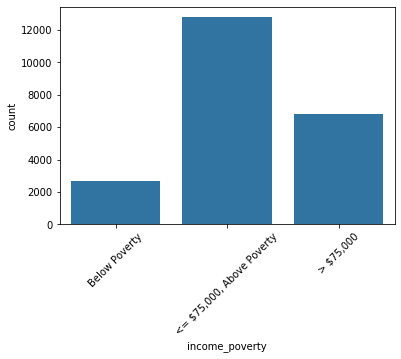

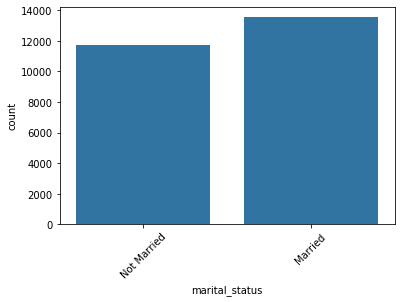

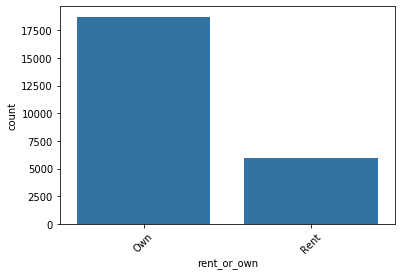

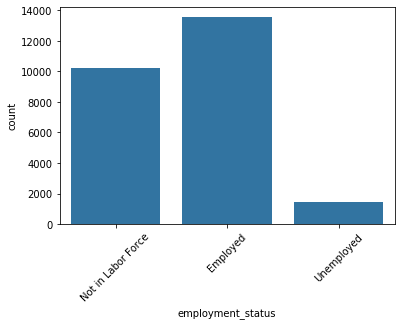

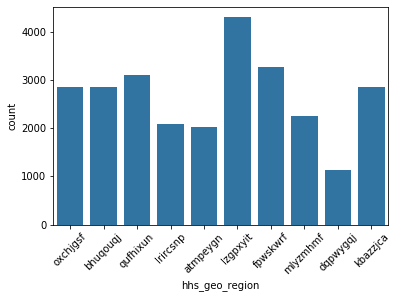

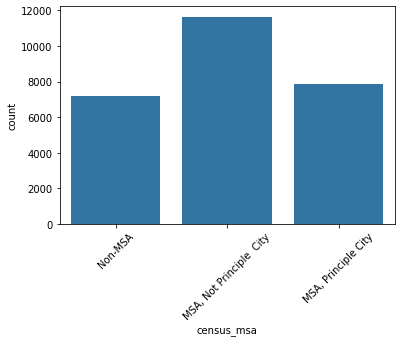

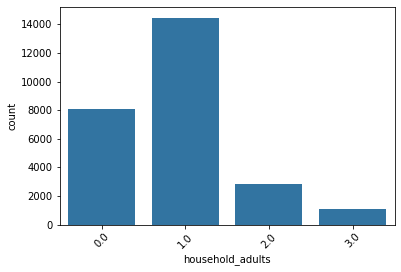

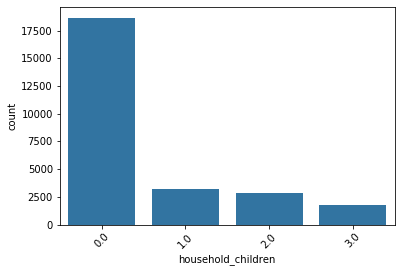

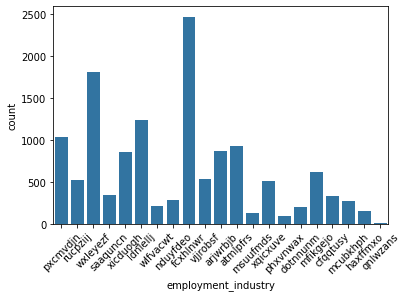

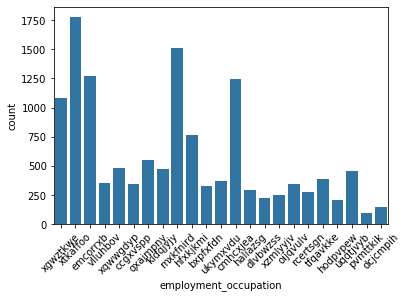

In [111]:
for i, col in enumerate(train_features.columns):
    plt.figure(i)
    sb.countplot(x=col, data=train_features, color=sb.color_palette()[0]);
    plt.xticks(rotation = 45);

## Target Variables
There are 2 target variables - *h1n1_vaccine* & *seasonal_vaccine*

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64


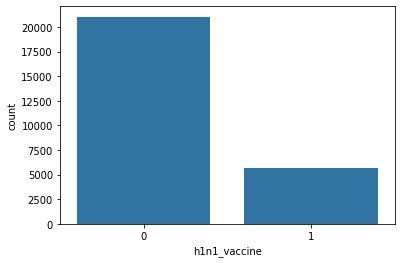

In [100]:
print(train_labels['h1n1_vaccine'].value_counts())
sb.countplot(x='h1n1_vaccine', data=train_labels, color=sb.color_palette()[0]);

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64


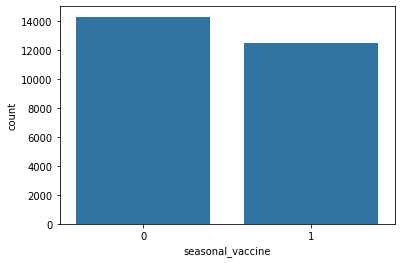

In [101]:
print(train_labels['seasonal_vaccine'].value_counts())
sb.countplot(x='seasonal_vaccine', data=train_labels, color=sb.color_palette()[0]);

In [124]:
train_labels['h1n1_vaccine'].corr(train_labels['seasonal_vaccine'], method='pearson')

0.37714265306144507

**Findings**
- *h1n1_vaccine* is imbalanced
- *seasonal_vaccine* is balanced
- pearson correlation between target variables is 0.377 which is low, indicating dependency between target variables as weak

### Relation between target variables and features

###### Combining features and labels into single data frame
Numpy's ```assert_array_equal``` will give an error if the two arrays- the row indices of the two data frames - don't match

In [115]:
np.testing.assert_array_equal(train_features.index.values, train_labels.index.values)

If the assertion run without error it means rows between features and labels match up and we can combine two data frames without worrying for mismatching of indices

In [ ]:
train_df = pd.concat([train_features, train_labels], axis=1)

In [113]:
## Ref: https://www.drivendata.co/blog/predict-flu-vaccine-data-benchmark/
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (train_df[[target, col]]
                         .groupby([target, col])
                         .size()
                         .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')
    
    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

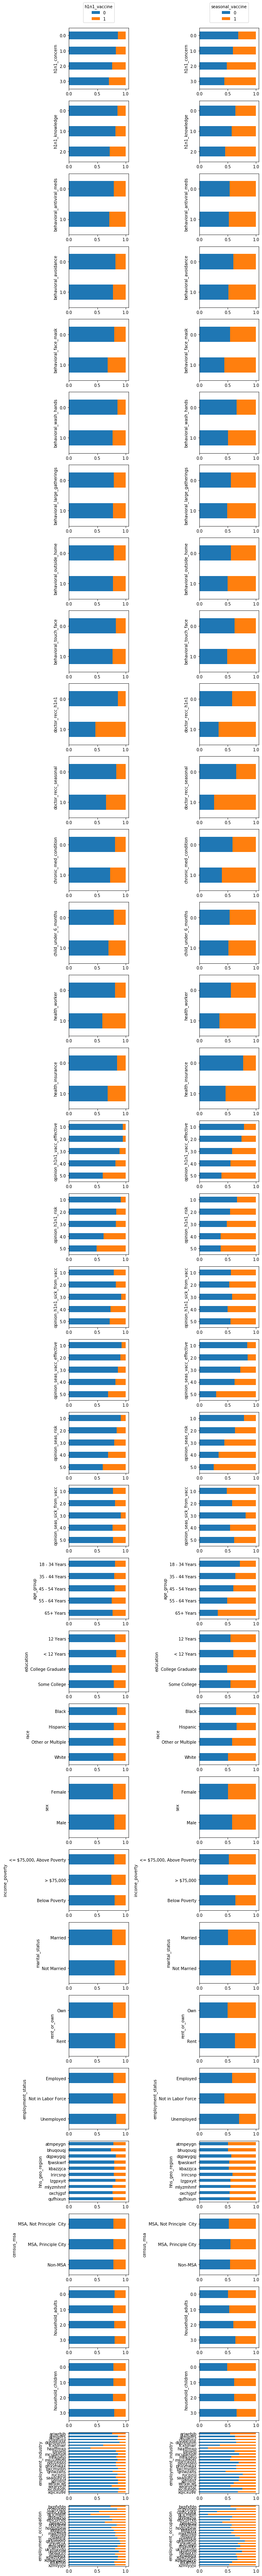

In [117]:
cols_to_plot = train_features.columns

fig, ax = plt.subplots(len(cols_to_plot), 2, figsize=(9, len(cols_to_plot)*2.5))

for idx, col in enumerate(cols_to_plot):
    #print(col)
    vaccination_rate_plot(col, 'h1n1_vaccine', train_df, ax=ax[idx, 0])
    vaccination_rate_plot(col, 'seasonal_vaccine', train_df, ax=ax[idx, 1])
    
    ax[0,0].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine')
    ax[0,1].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine')
    
    fig.tight_layout()

### Percentage of Missing Values

In [125]:
100*train_features.isnull().sum()/train_features.shape[0]

h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race                            0.000000
sex             

In [144]:
train_labels.isnull().sum()

h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

## Basic Summary of Numerical Features

In [289]:
## Outlier > 75th %tile + 1.5IQR & < 25th %tile - 1.5IQR
def outlier_count(x):
    upper_out = x.quantile(q=0.75) + 1.5 * iqr(x)
    lower_out = x.quantile(q=0.25) - 1.5 * iqr(x)
    
    return len(x[x > upper_out]) + len(x[x < lower_out])

def num_count_summary(df):
    df_num = df._get_numeric_data()
    #print(df_num.columns)
    data_info_num = pd.DataFrame()
    ## Counts Stats on Numeric Variable
    try: ## in case numeric variables not present
        for c in df_num.columns:
            data_info_num.loc[c, 'Negative Values Count'] = df_num[df_num[c] < 0].shape[0]
            data_info_num.loc[c, 'Positive Values Count'] = df_num[df_num[c] > 0].shape[0]
            data_info_num.loc[c, 'Zeros Count'] = df_num[df_num[c] == 0].shape[0]
            data_info_num.loc[c, 'Unique Count'] = len(df_num[c].dropna().unique())
            data_info_num.loc[c, 'Negative Infinity Count'] = df_num[df_num[c] == -np.inf].shape[0]
            data_info_num.loc[c, 'Positive Infinity Count'] = df_num[df_num[c] == np.inf].shape[0]
            data_info_num.loc[c, 'Missing Percentage'] = 100*df_num[df_num[c].isnull()].shape[0]/df_num.shape[0]
            data_info_num.loc[c, 'Count of Outliers'] = outlier_count(df_num[c])
            
    except:
        pass
    print("Outlier > 75th %tile + 1.5IQR & < 25th %tile - 1.5IQR")
    return data_info_num

In [290]:
num_count_summary(train_features)

Outlier > 75th %tile + 1.5IQR & < 25th %tile - 1.5IQR


,Negative Values Count,Positive Values Count,Zeros Count,Unique Count,Negative Infinity Count,Positive Infinity Count,Missing Percentage,Count of Outliers
h1n1_concern,0.0,23319.0,3296.0,4.0,0.0,0.0,0.344479,0.0
h1n1_knowledge,0.0,24085.0,2506.0,3.0,0.0,0.0,0.434343,0.0
behavioral_antiviral_meds,0.0,1301.0,25335.0,2.0,0.0,0.0,0.265848,1301.0
behavioral_avoidance,0.0,19228.0,7271.0,2.0,0.0,0.0,0.778822,0.0
behavioral_face_mask,0.0,1841.0,24847.0,2.0,0.0,0.0,0.071142,1841.0
behavioral_wash_hands,0.0,22015.0,4650.0,2.0,0.0,0.0,0.157262,4650.0
behavioral_large_gatherings,0.0,9547.0,17073.0,2.0,0.0,0.0,0.325757,0.0
behavioral_outside_home,0.0,8981.0,17644.0,2.0,0.0,0.0,0.307036,0.0
behavioral_touch_face,0.0,18001.0,8578.0,2.0,0.0,0.0,0.479275,0.0
doctor_recc_h1n1,0.0,5408.0,19139.0,2.0,0.0,0.0,8.087767,5408.0


**Findings:**<br>
    Though the dtype of above variables are numeric, the unique count are so small that these can be considered as categorical variables.

In [ ]:
'''
for col in []:
    train_features[col] = train_features[col].astype['object']
'''

## Basic Summary of Categorical Features

In [293]:
def cat_count_summary(df, id_cols):
    
    df_cat = df.drop(columns=id_cols).select_dtypes(['object', 'bool'])
    #print(df_cat)
    data_info_cat = pd.DataFrame()
    ## Counts Stats on Categorical Variable
    try: ## incase Categorical variables not present
        for c in df_cat.columns:
            data_info_cat.loc[c, 'Unique Categories'] = len(df_cat[c].dropna().unique())
            data_info_cat.loc[c, 'Missing Percentage'] = (df_cat[df_cat[c].isnull()].shape[0]*100 / df_cat.shape[0])
    except:
        pass
    #print(data_info_cat)
    return data_info_cat

In [294]:
cat_count_summary(train_features, ['respondent_id'])

,Unique Categories,Missing Percentage
age_group,5.0,0.000000
education,4.0,5.268282
race,4.0,0.000000
sex,2.0,0.000000
income_poverty,3.0,16.561201
marital_status,2.0,5.272026
rent_or_own,2.0,7.645936
employment_status,3.0,5.477965
hhs_geo_region,10.0,0.000000
census_msa,3.0,0.000000


### EDA with respect to *h1n1_vaccine* as target variable

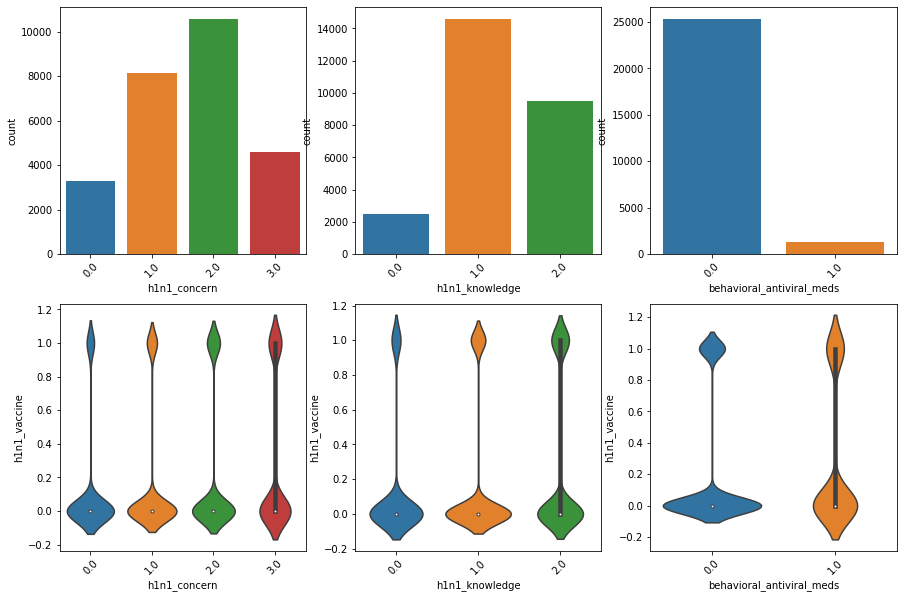

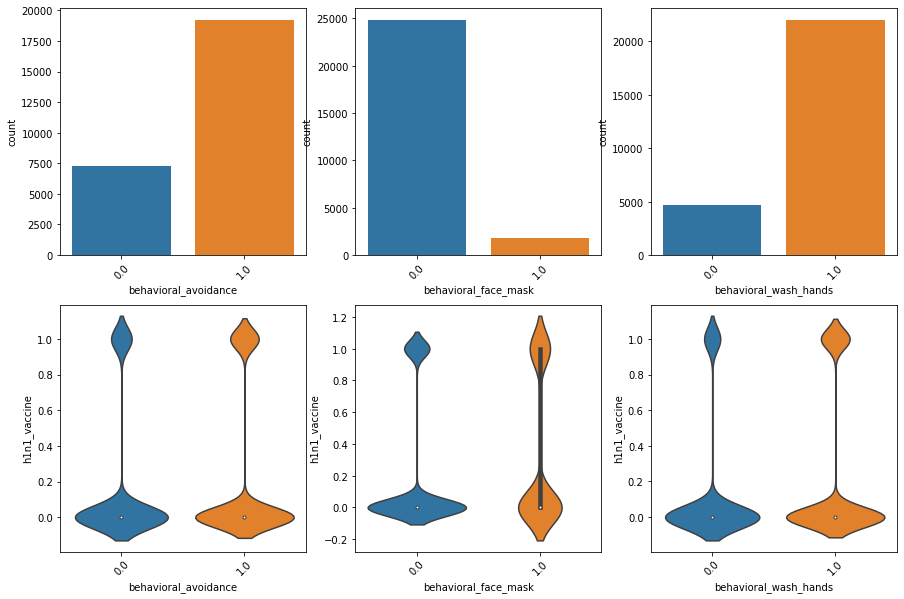

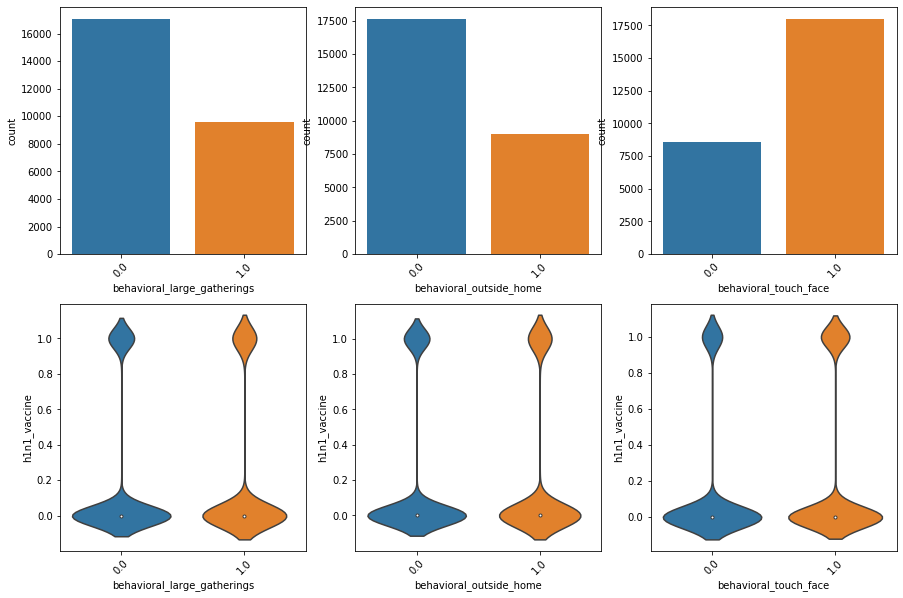

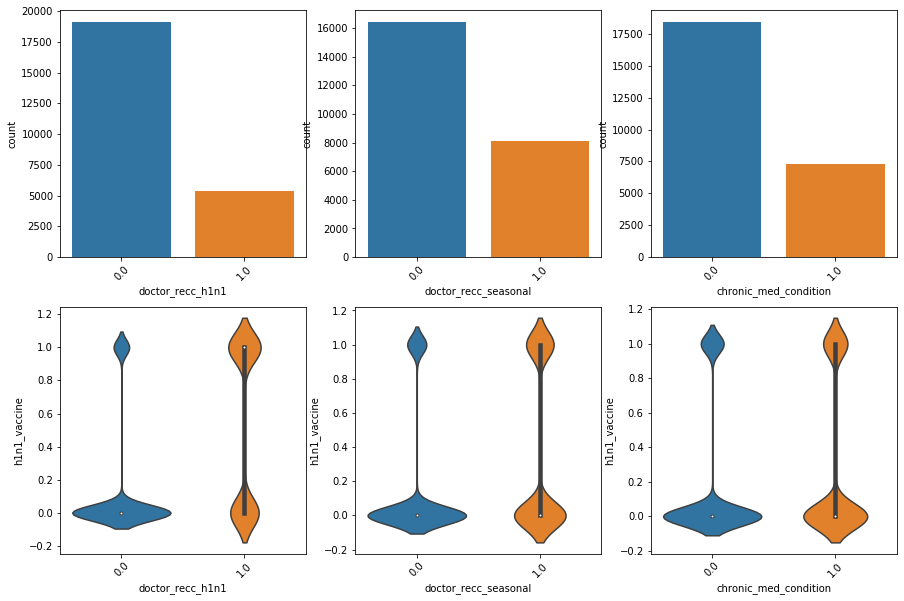

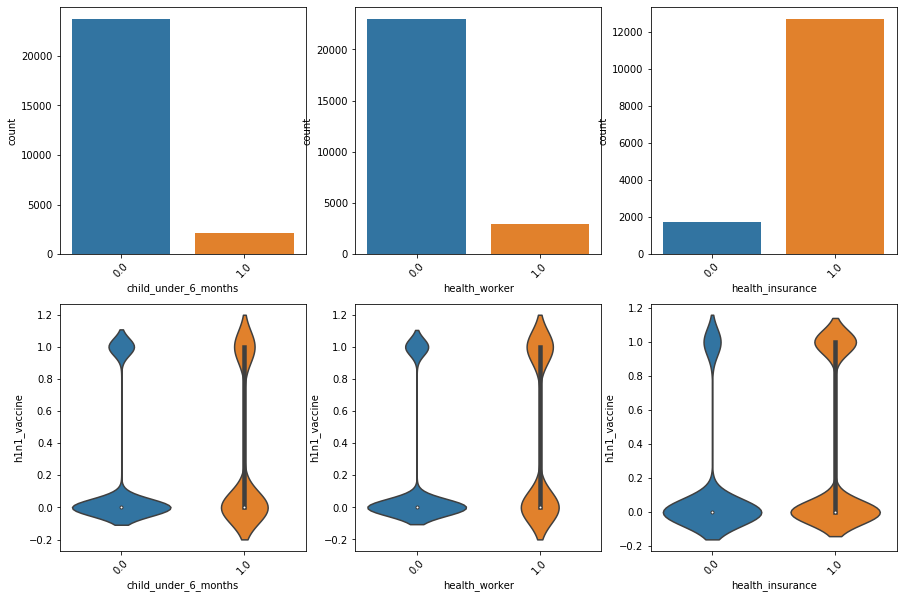

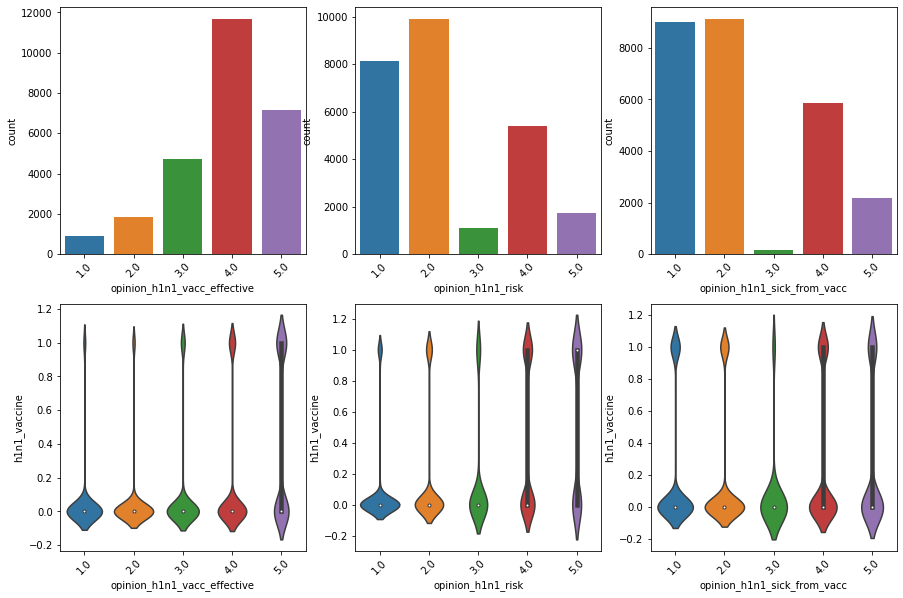

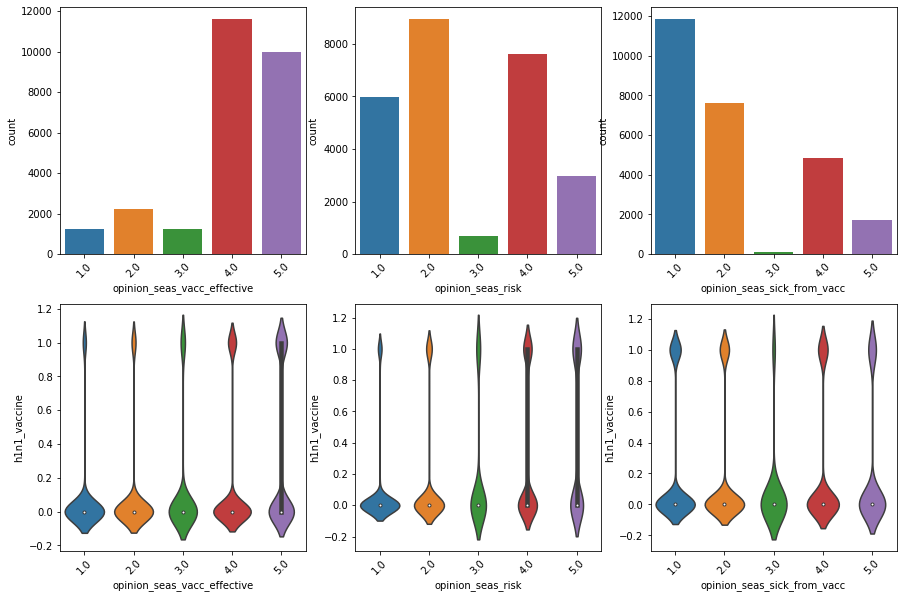

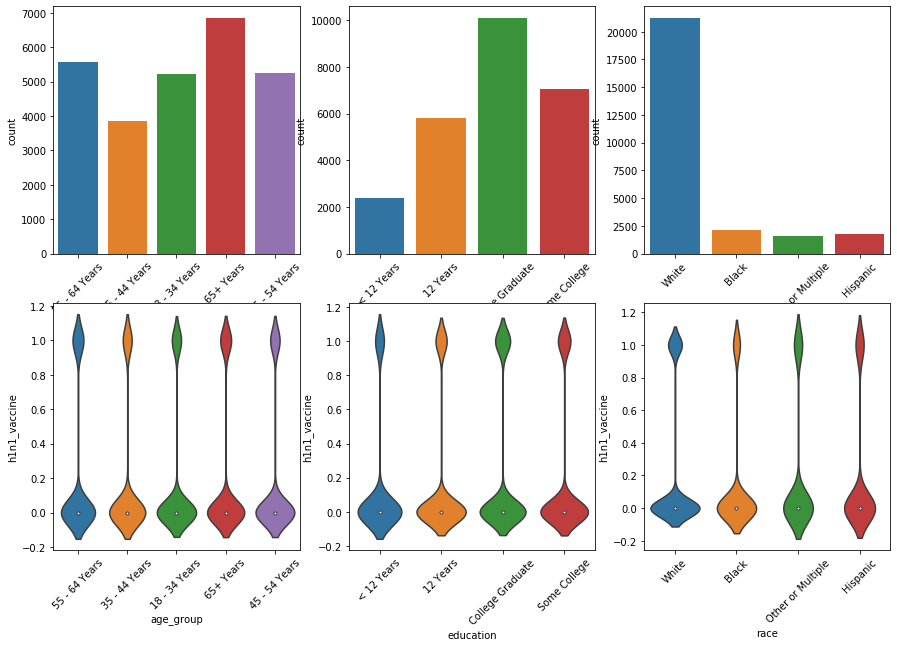

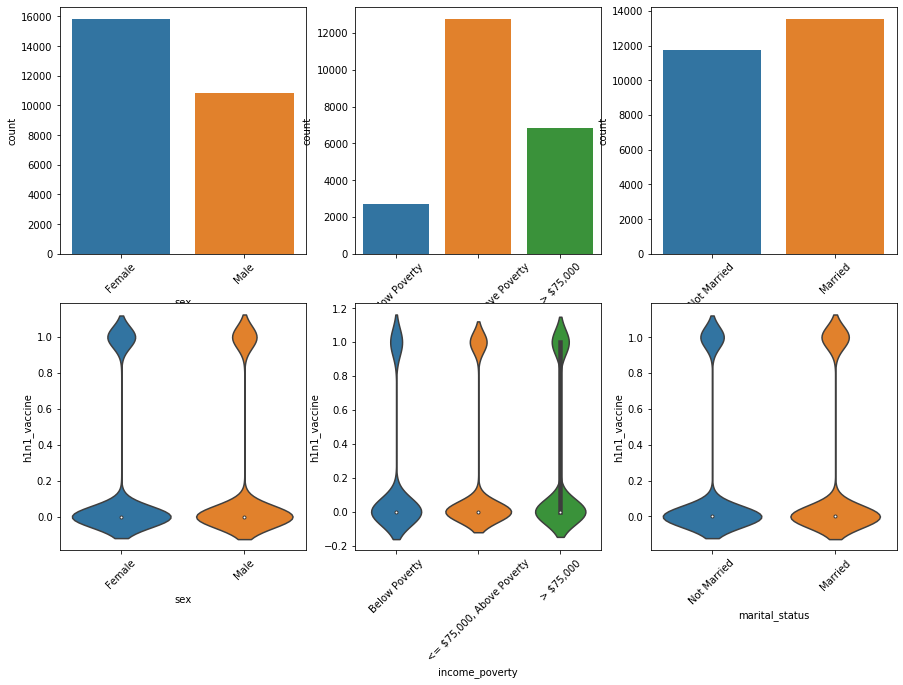

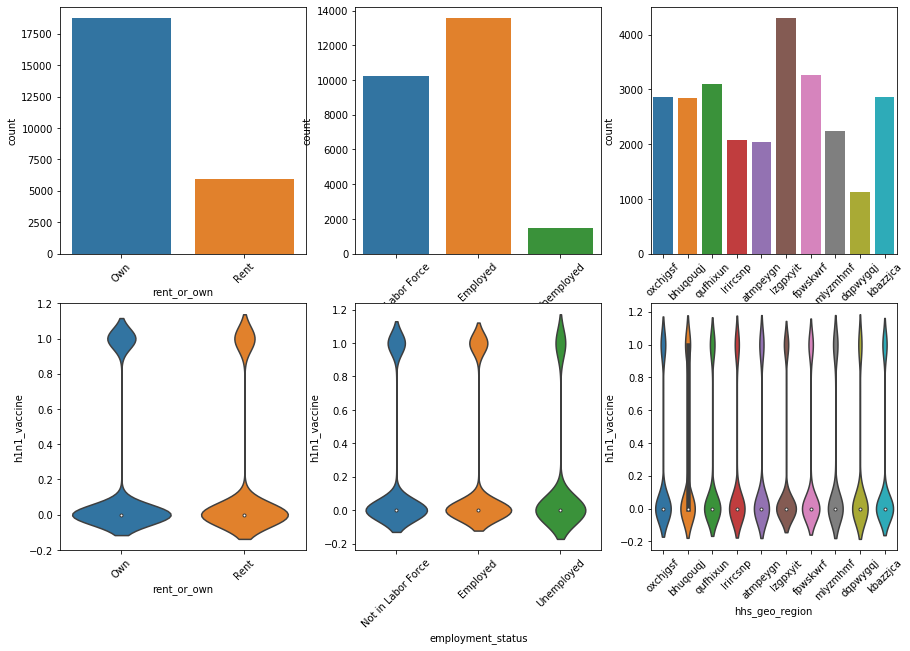

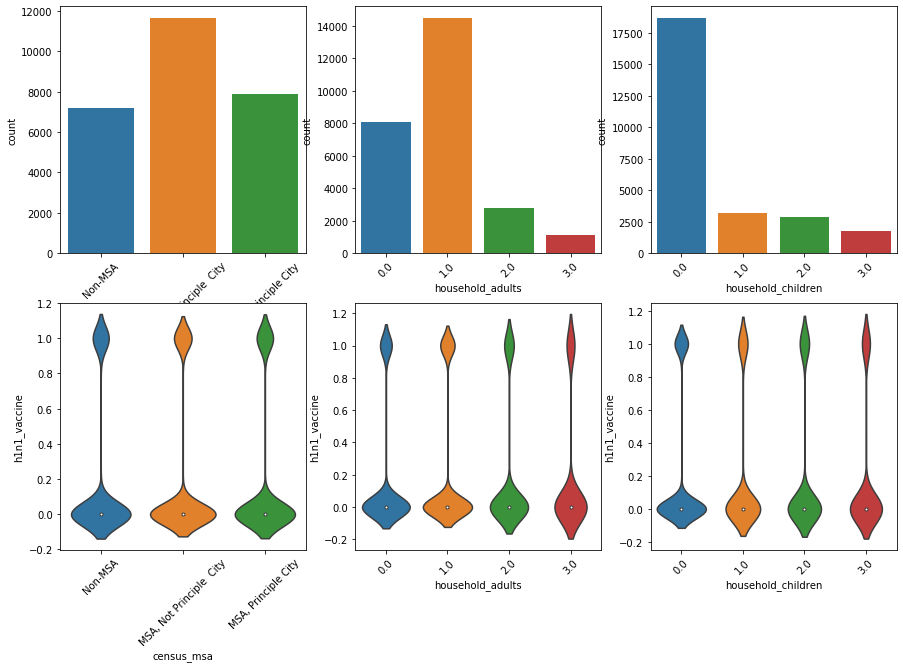

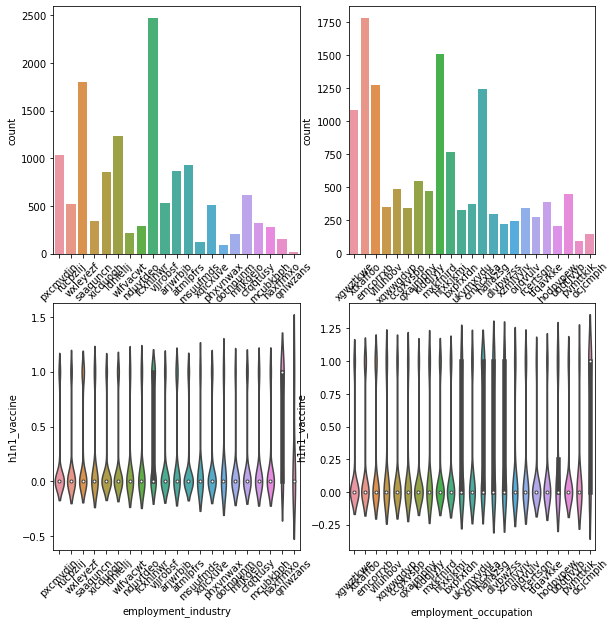

<Figure size 1080x720 with 0 Axes>

In [325]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(train_df.columns):
    if ix <= 3:
        if c != 'h1n1_vaccine' and c != 'seasonal_vaccine':
            ax1 = fig.add_subplot(2,3,ix)
            sb.countplot(data = train_df, x=c, ax = ax1)
            plt.xticks(rotation=45);
            ax2 = fig.add_subplot(2,3,ix+3)
            #sb.boxplot(data=train_df, x=c, y='h1n1_vaccine', ax=ax2)
            sb.violinplot(data=train_df, x=c, y='h1n1_vaccine', ax=ax2)
            #sns.swarmplot(data = ds_cat, x=c, y ='SalePrice', color = 'k', alpha = 0.4, ax=ax2)
            plt.xticks(rotation=45);
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

### EDA with respect to *seasonal_vaccine* as target variable

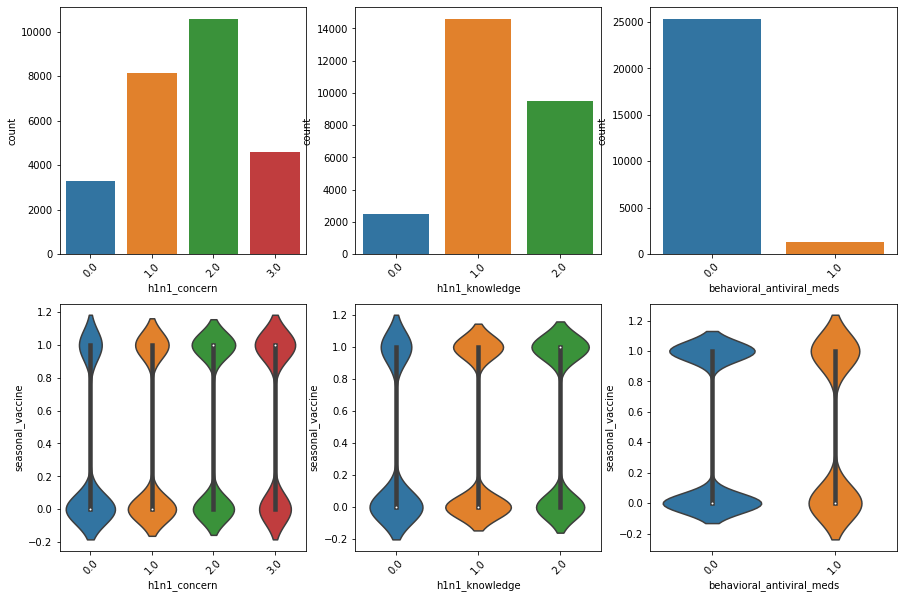

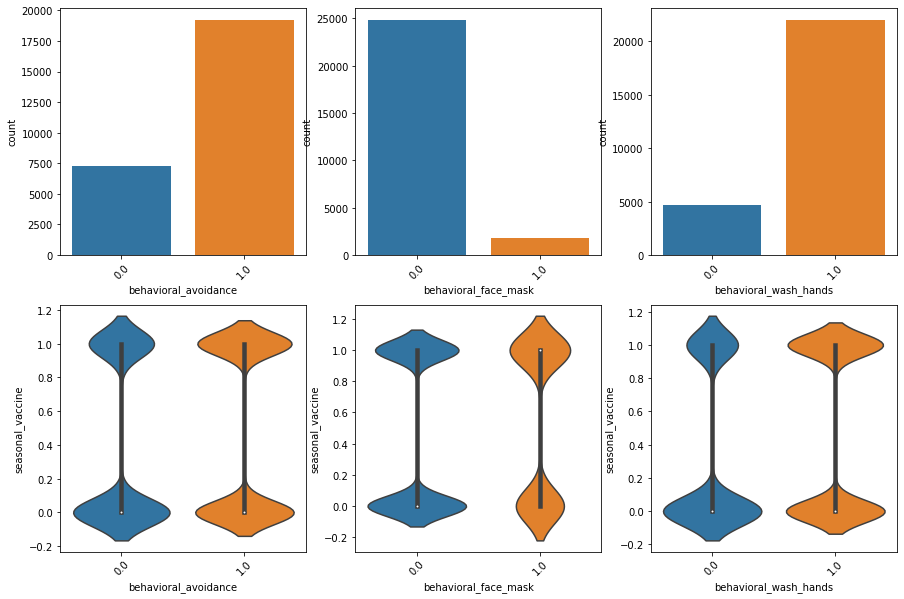

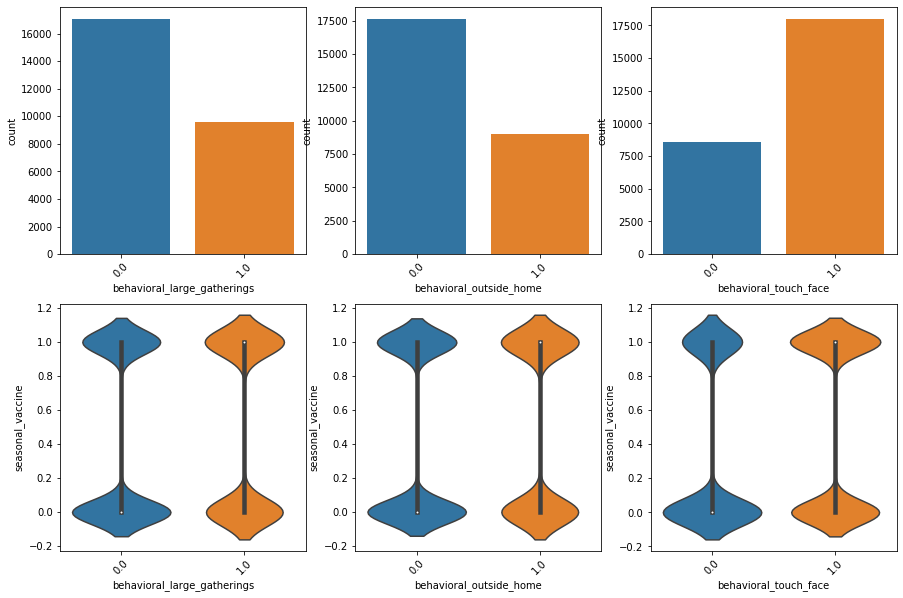

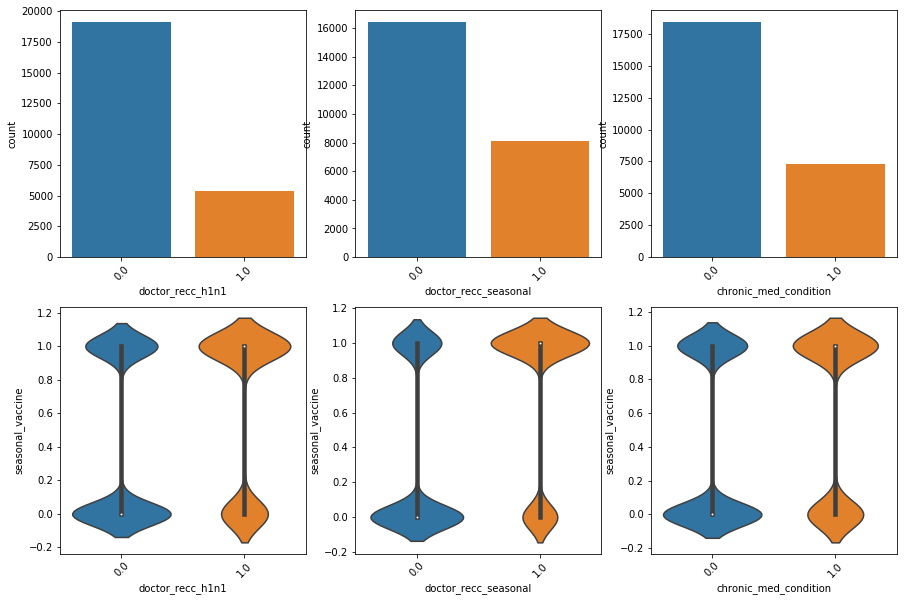

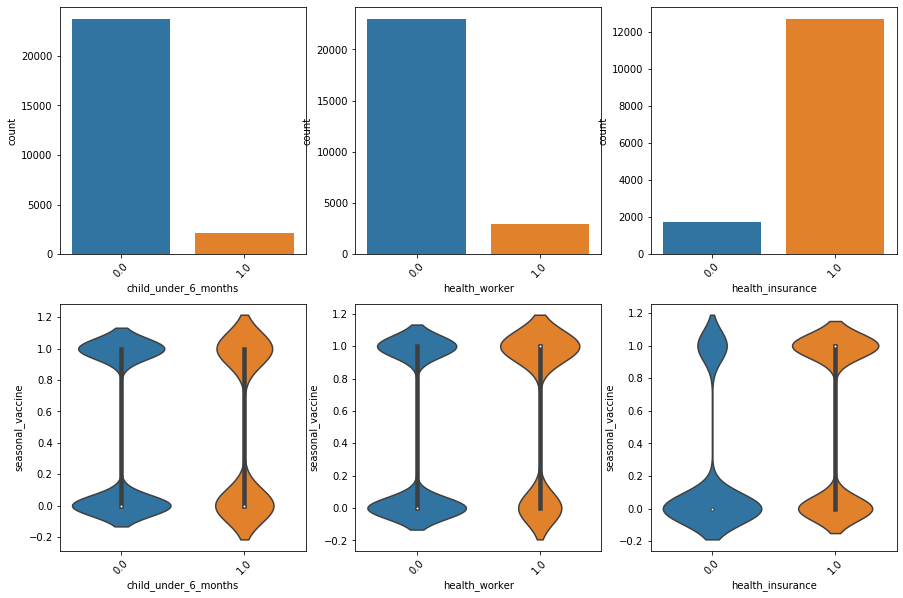

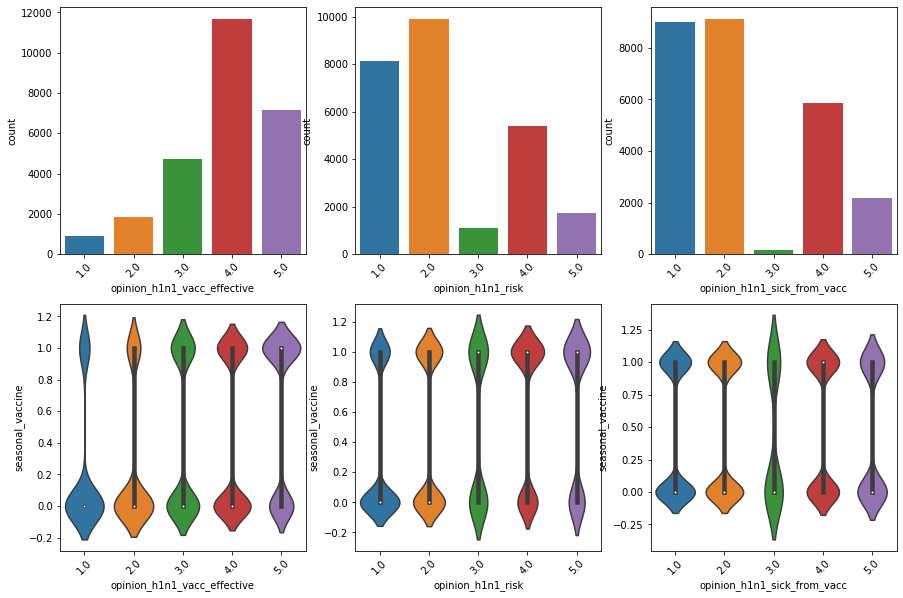

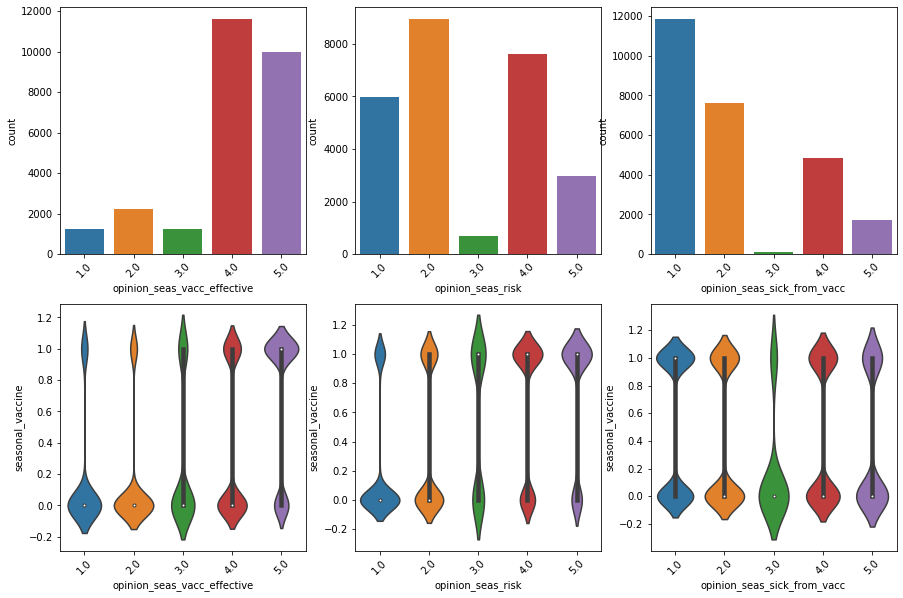

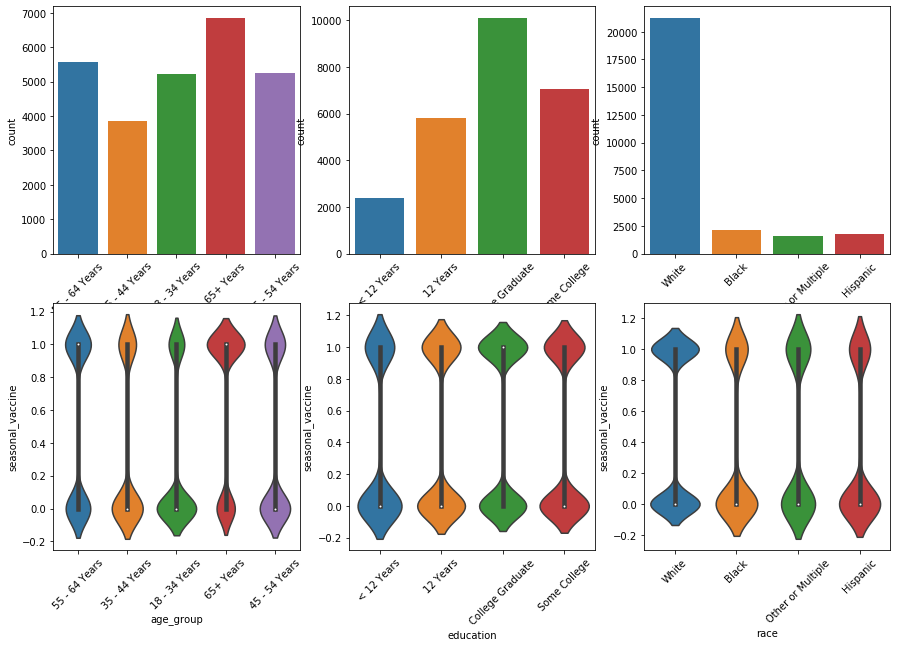

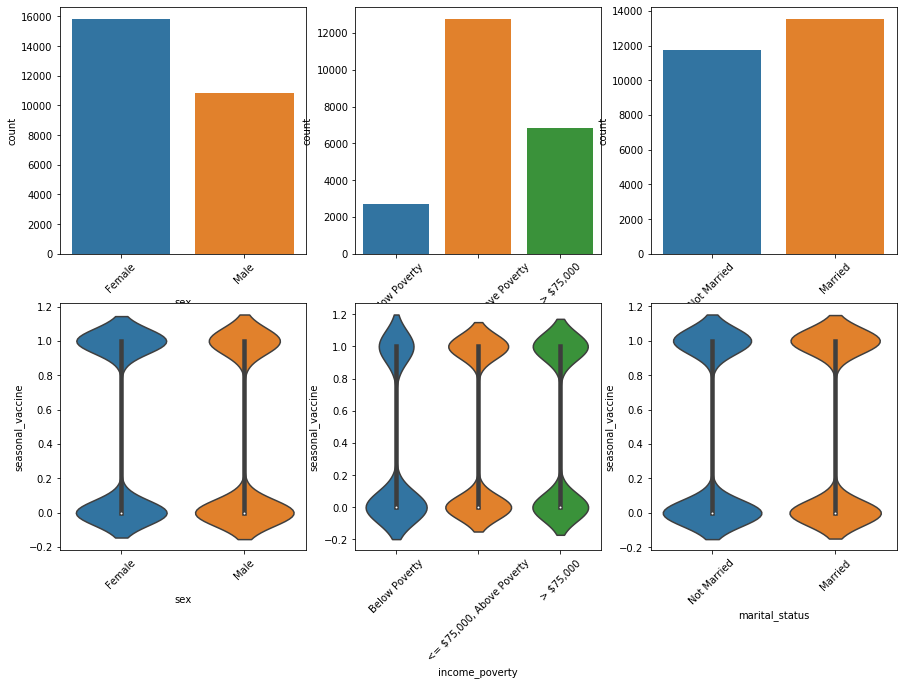

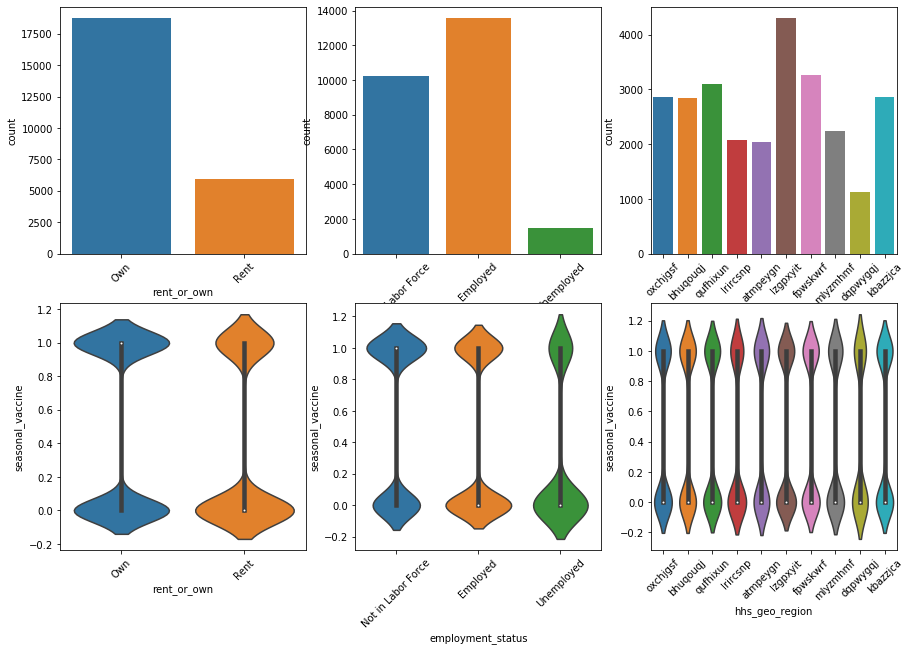

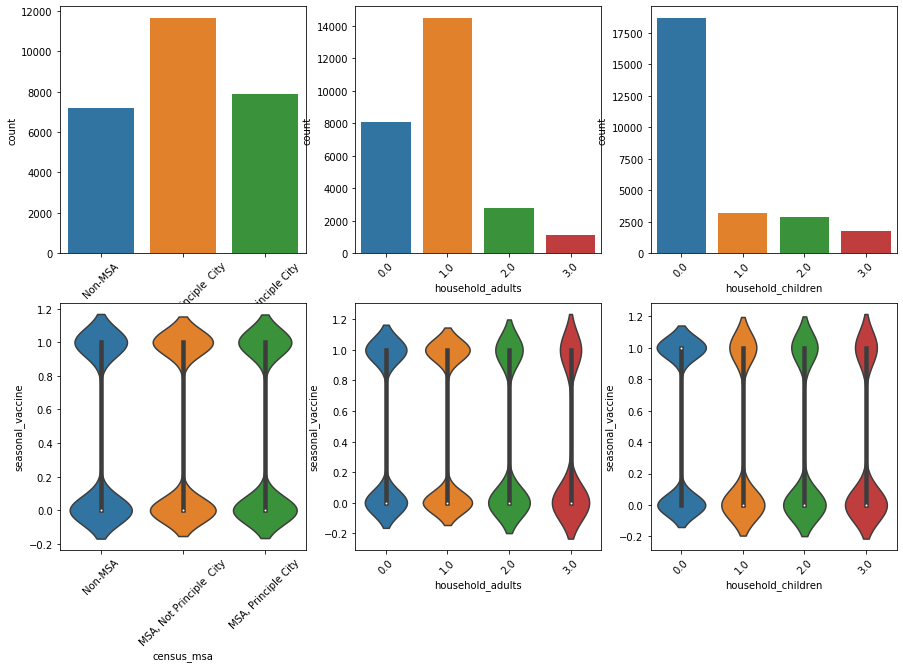

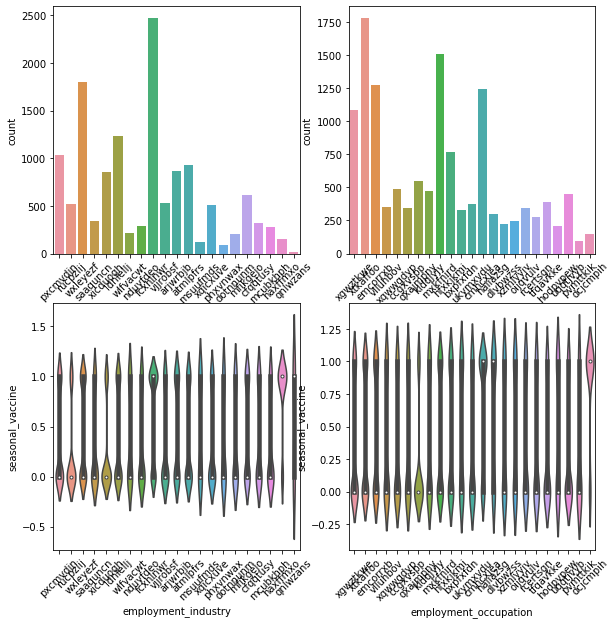

<Figure size 1080x720 with 0 Axes>

In [326]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(train_df.columns):
    if ix <= 3:
        if c != 'h1n1_vaccine' and c != 'seasonal_vaccine':
            ax1 = fig.add_subplot(2,3,ix)
            sb.countplot(data = train_df, x=c, ax = ax1)
            plt.xticks(rotation=45);
            ax2 = fig.add_subplot(2,3,ix+3)
            #sb.boxplot(data=train_df, x=c, y='h1n1_vaccine', ax=ax2)
            sb.violinplot(data=train_df, x=c, y='seasonal_vaccine', ax=ax2)
            #sns.swarmplot(data = ds_cat, x=c, y ='SalePrice', color = 'k', alpha = 0.4, ax=ax2)
            plt.xticks(rotation=45);
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

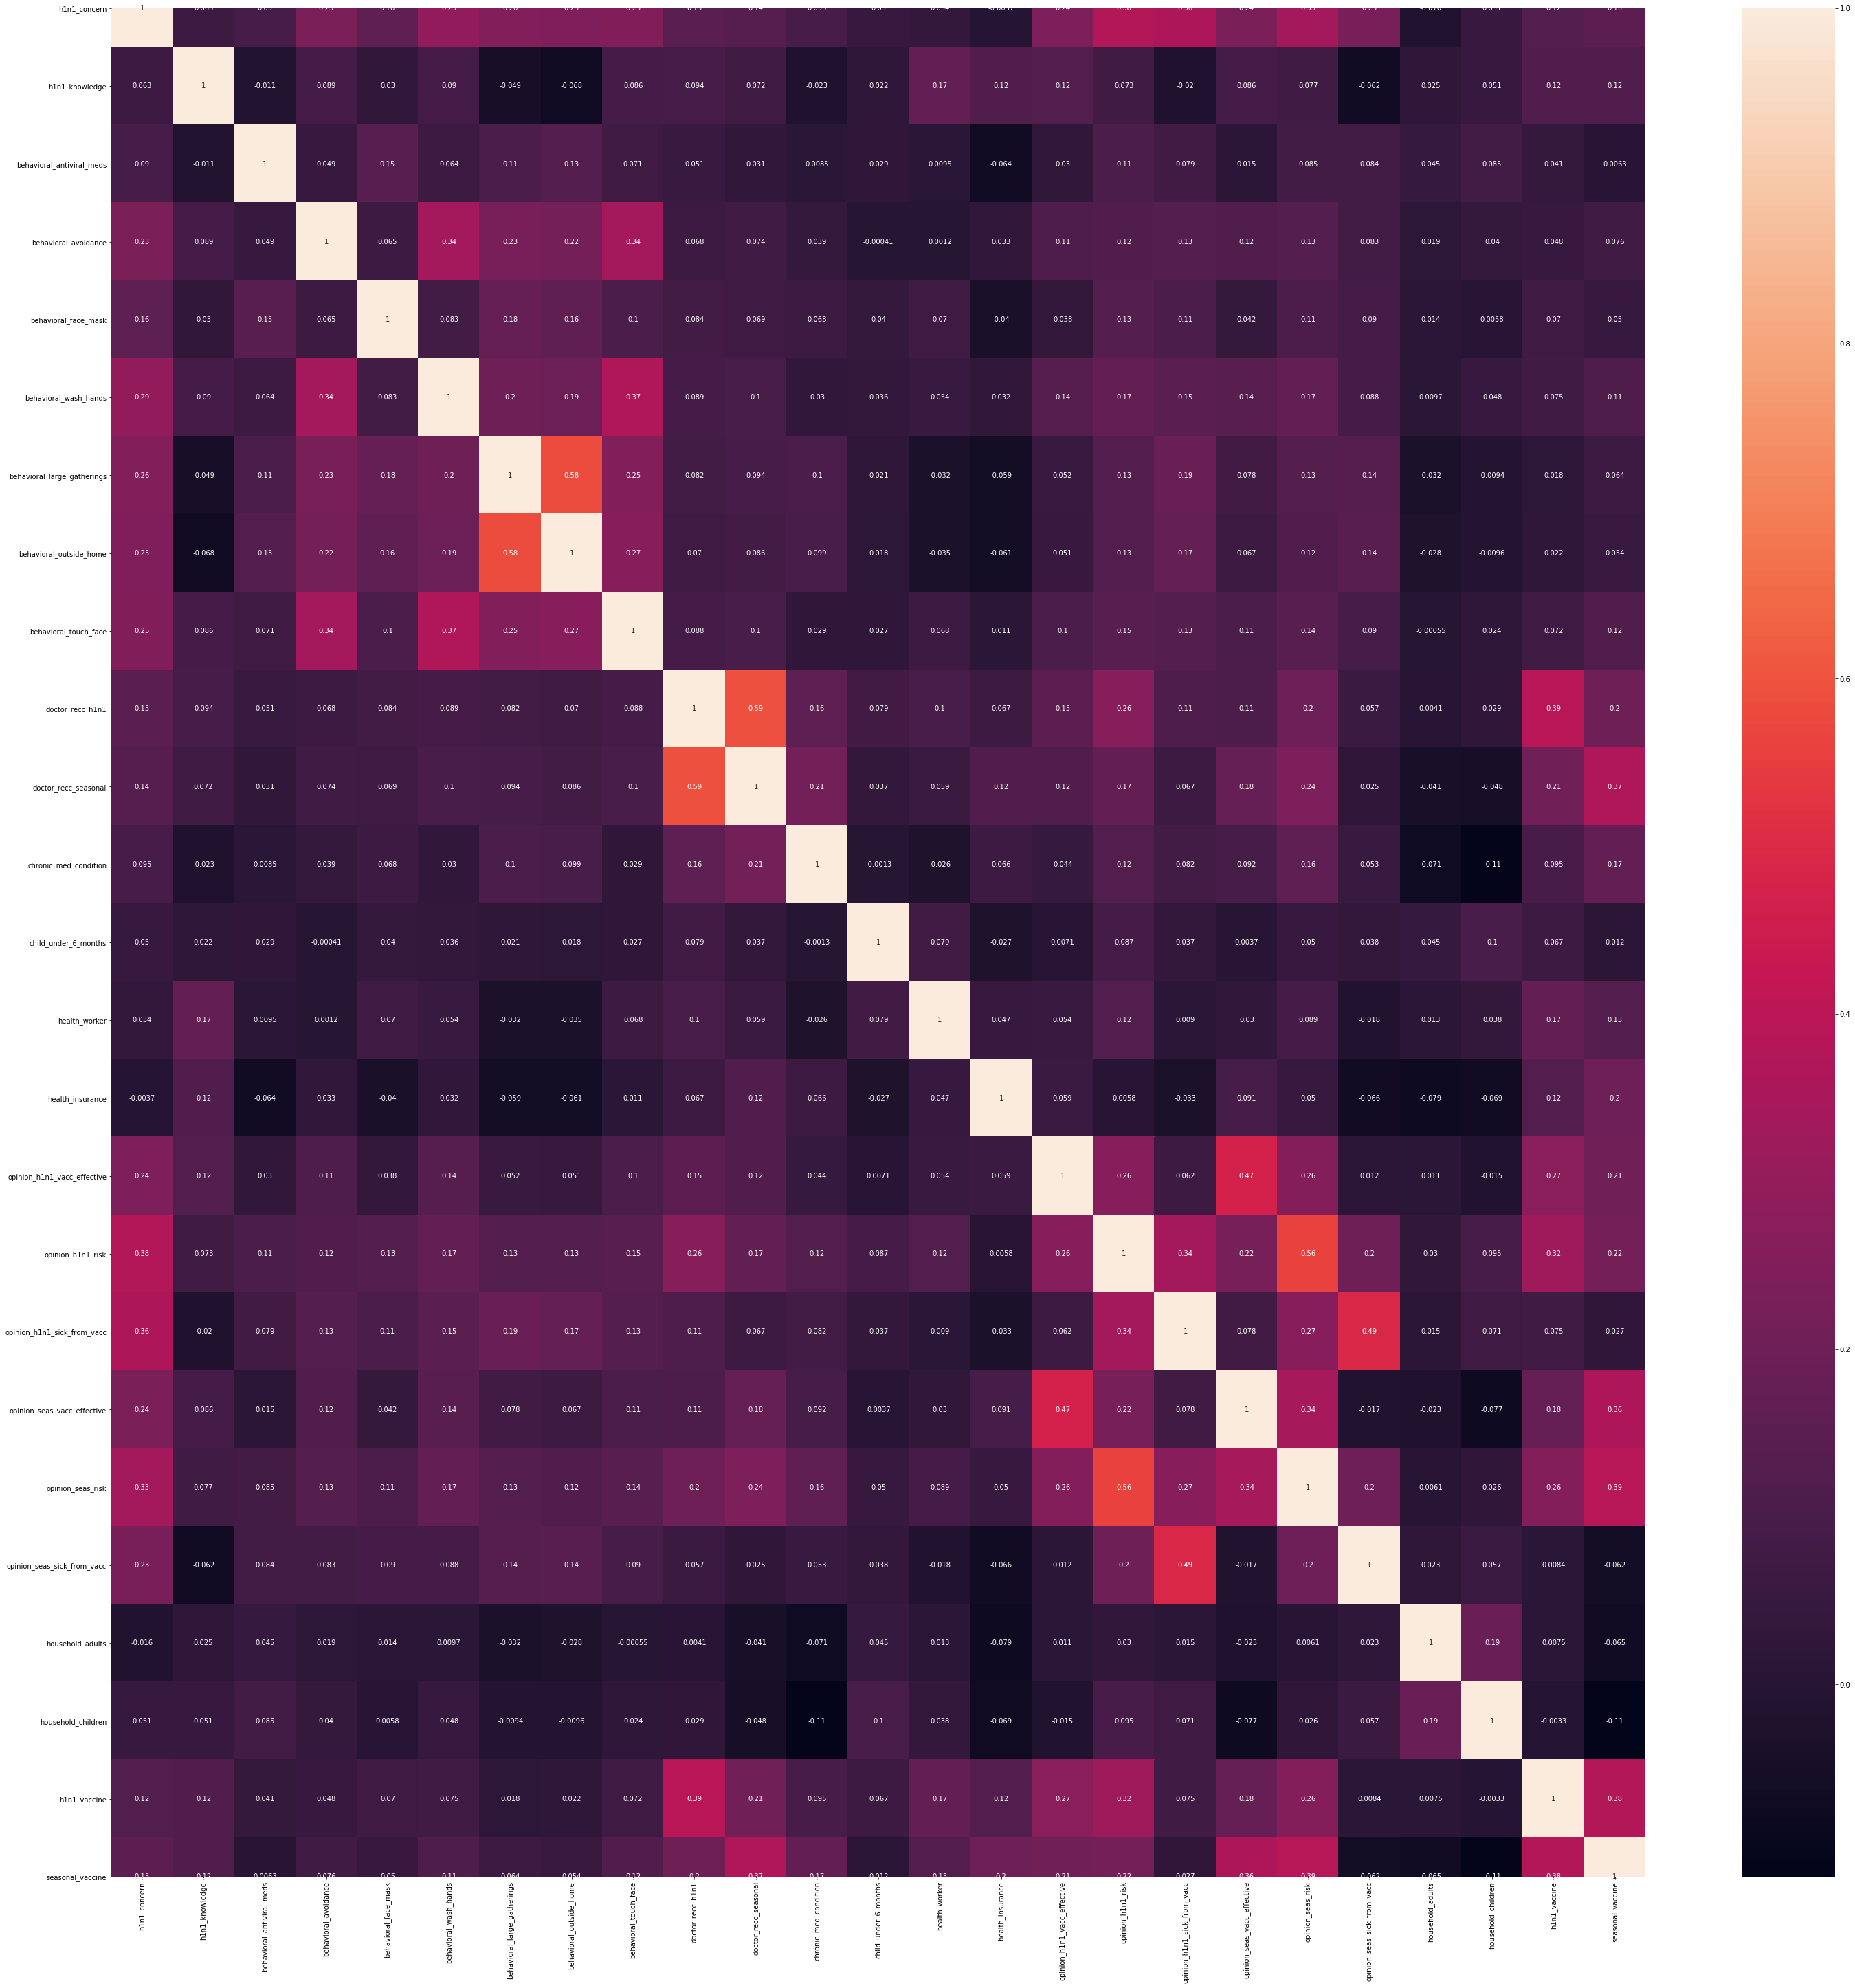

In [327]:
plt.figure(figsize=(50,50))
sb.heatmap(train_df.corr(), annot = True);

From the heat map, we can deduce there are no redundant features(meaning we cannot see high correlation between any two features)

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


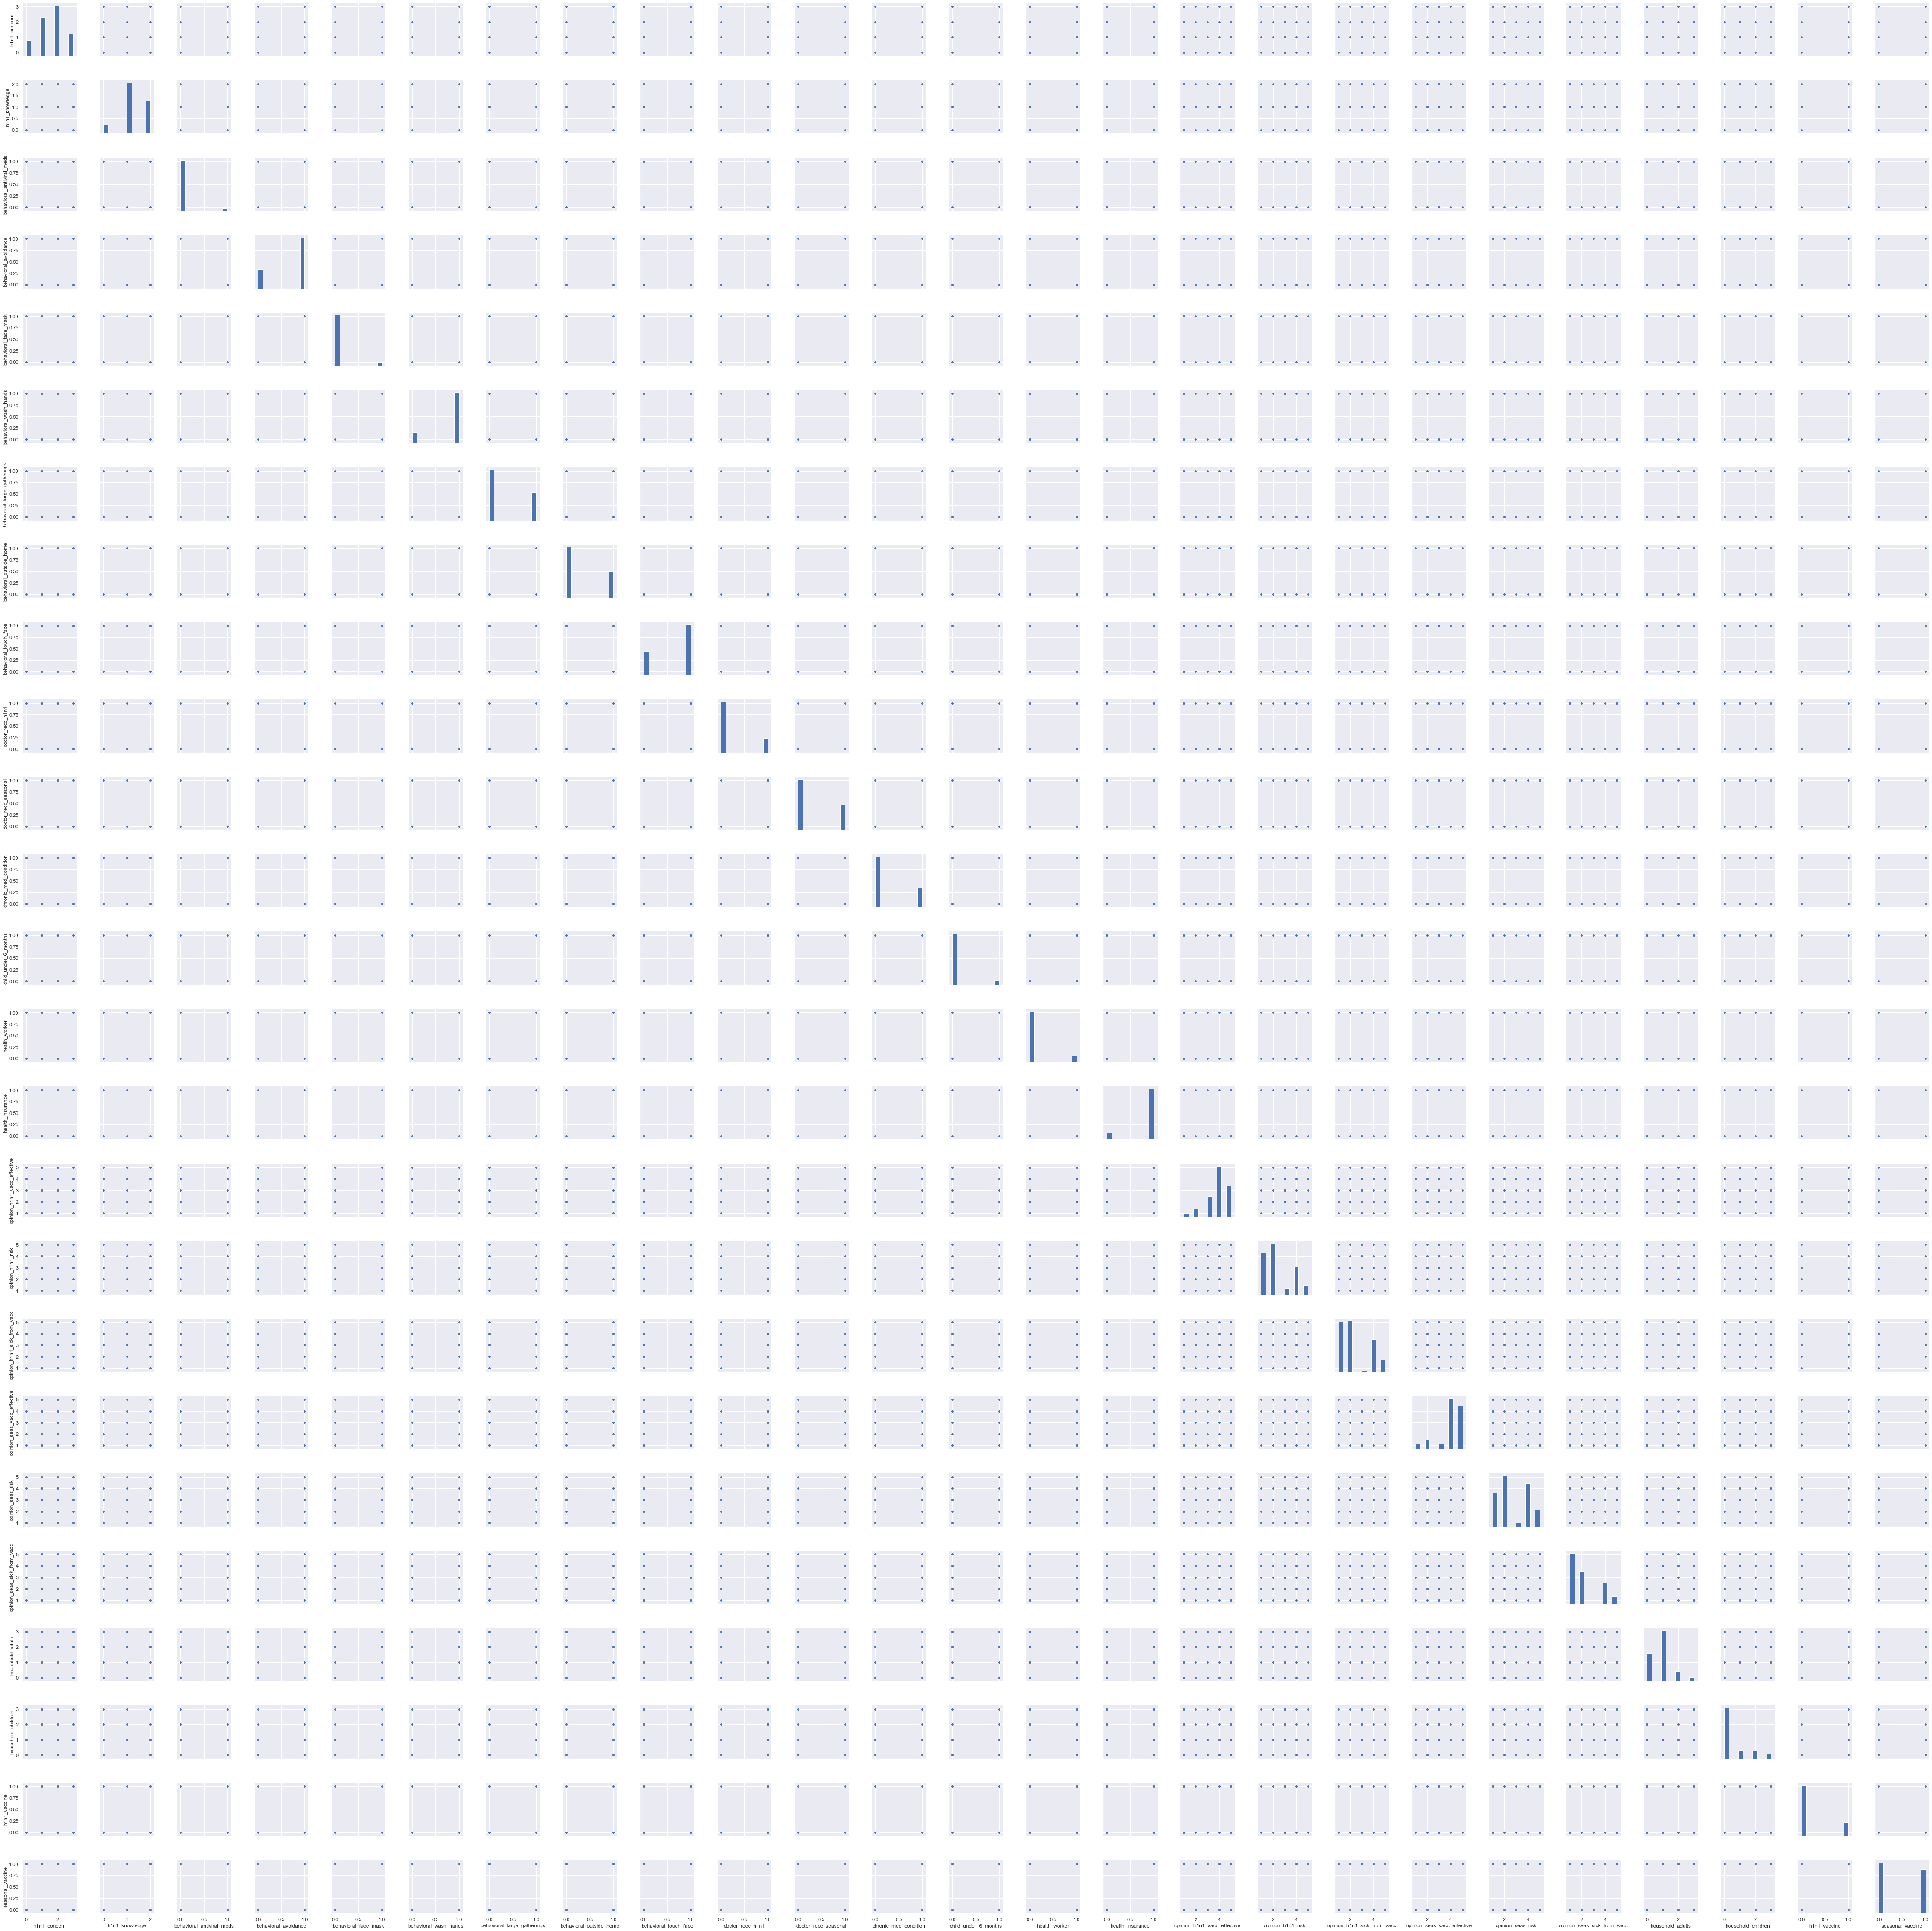

In [329]:
sb.set()
cols = train_df.columns
sb.pairplot(train_df[cols], size=2.5)
plt.show()

### Dropping features

In [25]:
# Dropping features with more than 15% missing values
for f in train_features.columns:
    if train_features[f].isnull().sum()/train_features.shape[0] > .15:
        train_features.drop([f], axis=1, inplace=True)

In [26]:
train_features.shape

(26707, 31)

**Findings** : It is observed that AUROC score is slightly better when modeled without dropping any features. Therefore used all the features further in modeling the data.<br>
Note: I deleted cells where I implemented models after dropping features as per above condition. Feel free to try it out for yourself.

### Encoding categorical variables

In [12]:
train_features.columns[train_features.dtypes == "object"].values

array(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa', 'employment_industry',
       'employment_occupation'], dtype=object)

In [13]:
binary_features = []
for feature in train_features.columns:
    if len(train_features[feature].dropna().unique()) == 2:
        binary_features.append(feature)

print(binary_features)
print('Total number of binary categorical features:',len(binary_features))

['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'sex', 'marital_status', 'rent_or_own']
Total number of binary categorical features: 16


Binary features with dtype=object can be converted into numerical value using get_dummies()

In [18]:
for x in ['sex', 'marital_status', 'rent_or_own', 'health_insurance']:
    dummies = pd.get_dummies(train_features[x], prefix=x, dummy_na=False, drop_first=True)
    train_features = train_features.drop(x,1)
    train_features = pd.concat([train_features, dummies], axis=1)
print(train_features.shape)
train_features.head()

(26707, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,income_poverty,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,sex_Male,marital_status_Not Married,rent_or_own_Rent,health_insurance_1.0
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Below Poverty,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,1,0,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Below Poverty,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1,1,1,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,"<= $75,000, Above Poverty",Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,1,1,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Below Poverty,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,"<= $75,000, Above Poverty",Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0,0,0


Checking other object features

In [18]:
cat_f = train_features.columns[train_features.dtypes == "object"].values

for f in cat_f:
    print(train_features[f].value_counts())
    print('\n')

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64


College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: education, dtype: int64


White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64


<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64


Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: employment_status, dtype: int64


lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjca    2858
bhuqouqj    2846
mlyzmhmf    2243
lrircsnp    2078
atmpeygn    2033
dqpwygqj    1126
Name: hhs_geo_region, dtype: int64


MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census

features - *age_group*, *education*, *race*, *employment_status*, *income_poverty*, *census_msa* have few categories. Therefore one hot encoding can be applied to these features.

In [19]:
for x in ['age_group', 'education', 'race', 'employment_status', 'income_poverty', 'census_msa']:
    dummies = pd.get_dummies(train_features[x], prefix=x, dummy_na=False, drop_first=True)
    train_features = train_features.drop(x,1)
    train_features = pd.concat([train_features, dummies], axis=1)
print(train_features.shape)
train_features.head()

(26707, 45)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,hhs_geo_region,household_adults,household_children,employment_industry,employment_occupation,sex_Male,marital_status_Not Married,rent_or_own_Rent,health_insurance_1.0,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,race_Hispanic,race_Other or Multiple,race_White,employment_status_Not in Labor Force,employment_status_Unemployed,"income_poverty_> $75,000",income_poverty_Below Poverty,"census_msa_MSA, Principle City",census_msa_Non-MSA
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,oxchjgsf,0.0,0.0,NaN,NaN,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,bhuqouqj,0.0,0.0,pxcmvdjn,xgwztkwe,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,qufhixun,2.0,0.0,rucpziij,xtkaffoo,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,lrircsnp,0.0,0.0,NaN,NaN,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,qufhixun,1.0,0.0,wxleyezf,emcorrxb,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0


#### Frequency Encoding

In [20]:
train_features.hhs_geo_region = train_features.hhs_geo_region.map(train_features.hhs_geo_region.value_counts().to_dict())
train_features.employment_industry = train_features.employment_industry.map(train_features.employment_industry.value_counts().to_dict())
train_features.employment_occupation = train_features.employment_occupation.map(train_features.employment_occupation.value_counts().to_dict())

#### Filling Missing values

In [21]:
for column in train_features.columns:
    train_features[column].fillna(train_features[column].mode()[0], inplace=True)

Creating a new csv files for cleaned data

In [92]:
train_features.to_csv('cleaned_tf.csv', index=True)
train_labels.to_csv('cleaned_tl.csv', index=True)

### Applying on test data

In [65]:
test_features = pd.read_csv('Test_Features.csv', index_col="respondent_id")

In [527]:
test_features.drop(['health_insurance','income_poverty','employment_industry','employment_occupation'],
                  axis=1,
                  inplace=True)

In [66]:
for x in ['sex', 'marital_status', 'rent_or_own', 'health_insurance']:
    dummies = pd.get_dummies(test_features[x], prefix=x, dummy_na=False, drop_first=True)
    test_features = test_features.drop(x,1)
    test_features = pd.concat([test_features, dummies], axis=1)

In [67]:
for x in ['age_group', 'education', 'race', 'employment_status', 'income_poverty', 'census_msa']:
    dummies = pd.get_dummies(test_features[x], prefix=x, dummy_na=False, drop_first=True)
    test_features = test_features.drop(x,1)
    test_features = pd.concat([test_features, dummies], axis=1)
print(test_features.shape)

(26708, 45)


In [68]:
test_features.hhs_geo_region = test_features.hhs_geo_region.map(test_features.hhs_geo_region.value_counts().to_dict())
test_features.employment_industry = test_features.employment_industry.map(test_features.employment_industry.value_counts().to_dict())
test_features.employment_occupation = test_features.employment_occupation.map(test_features.employment_occupation.value_counts().to_dict())

In [69]:
for column in test_features.columns:
    test_features[column].fillna(test_features[column].mode()[0], inplace=True)

In [70]:
test_probas = estimators.predict_proba(test_features)
test_probas

[array([[0.84276646, 0.15723354],
        [0.9747541 , 0.0252459 ],
        [0.77286667, 0.22713333],
        ...,
        [0.83653716, 0.16346284],
        [0.95925609, 0.04074391],
        [0.40705284, 0.59294716]]), array([[0.81164111, 0.18835889],
        [0.95610163, 0.04389837],
        [0.26284048, 0.73715952],
        ...,
        [0.67663565, 0.32336435],
        [0.67080247, 0.32919753],
        [0.3589568 , 0.6410432 ]])]

In [71]:
submission_df = pd.read_csv('Submission.csv', index_col="respondent_id")
submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7
26710,0.5,0.7
26711,0.5,0.7


In [72]:
np.testing.assert_array_equal(test_features.index.values, 
                              submission_df.index.values)


In [73]:
# Save predictions to submission data frame
submission_df["h1n1_vaccine"] = test_probas[0][:, 1]
submission_df["seasonal_vaccine"] = test_probas[1][:, 1]

submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.157234,0.188359
26708,0.025246,0.043898
26709,0.227133,0.737160
26710,0.611889,0.867332
26711,0.369191,0.581309


In [74]:
submission_df.to_csv('all_f_GradientBoosting_sub.csv', index=True)